In [6]:
# Clustering/Dimensionality Reduction
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# DataScience
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("myopia.csv")
target = df.MYOPIC
df.drop(columns=["MYOPIC"], inplace=True)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AGE        618 non-null    int64  
 1   SPHEQ      618 non-null    float64
 2   AL         618 non-null    float64
 3   ACD        618 non-null    float64
 4   LT         618 non-null    float64
 5   VCD        618 non-null    float64
 6   SPORTHR    618 non-null    int64  
 7   READHR     618 non-null    int64  
 8   COMPHR     618 non-null    int64  
 9   STUDYHR    618 non-null    int64  
 10  TVHR       618 non-null    int64  
 11  DIOPTERHR  618 non-null    int64  
 12  MOMMY      618 non-null    int64  
 13  DADMY      618 non-null    int64  
dtypes: float64(5), int64(9)
memory usage: 67.7 KB


In [8]:
scaler = StandardScaler()
df_scale = scaler.fit_transform(df)

In [9]:
myopia_pca = PCA(n_components=0.9)
pcas = myopia_pca.fit_transform(df_scale)

In [11]:
pcas[0]

array([ 0.53550271,  1.14500427, -1.38501894,  0.11600593, -3.22669052,
       -1.92845879, -1.95889156, -1.92299652,  0.02675285,  0.17814386])

C:\Users\brenn\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


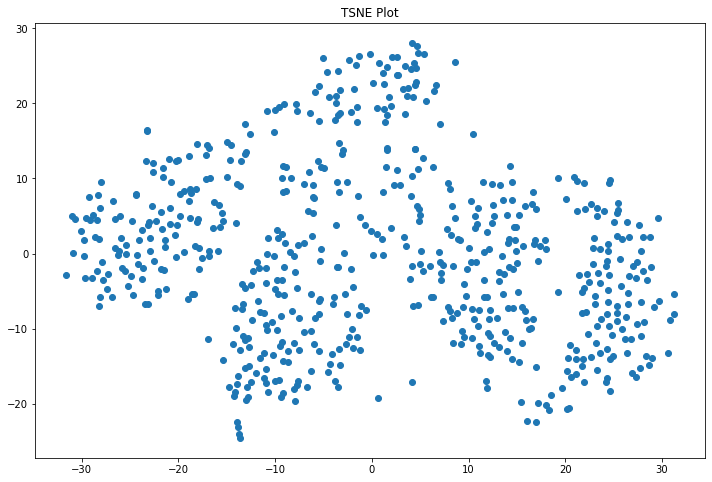

In [12]:
# Check for obvious clusters
X = TSNE(learning_rate="auto").fit_transform(pcas)

plt.figure(figsize=(12,8))

plt.scatter(X[:,0], X[:,1])
plt.title("TSNE Plot")
plt.show()

C:\Users\brenn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


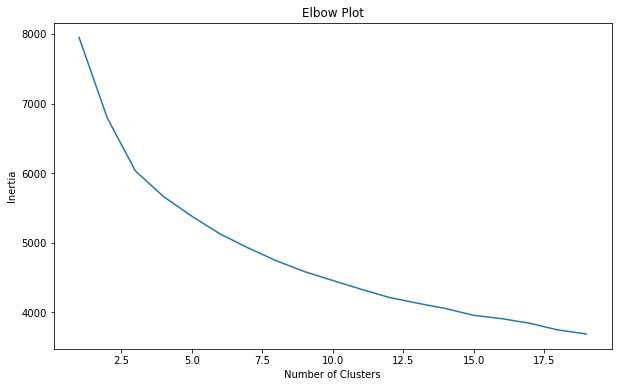

In [13]:
inertia = []
k_range = list(range(1, 20))

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pcas)
    
    inertia.append(kmeans.inertia_)
    
# make plot
plt.figure(figsize=(10,6))

plt.plot(k_range, inertia)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Plot")

plt.show()

We can see from the elbow plot that 3 clusters is ideal. The TSNE graph shows around 5 clusters. So 3 to 5 clusters is ideal.